# Link iNaturalist observations to TRY Summary Stats

Link iNaturalist vascular plant observations to the previously created trait TRY summary statistics.

This section covers:

- Merge iNat and TRY
- Fuzzy merge
- Log trait values
- Number of observations per trait
- Plot observation density after merge

## Packages

In [1]:
import pandas as pd
import os
import numpy as np

# fuzzy matching
#import rapidfuzz
from rapidfuzz import process, fuzz

# plotting
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import cartopy.crs as ccrs # plot maps
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

ModuleNotFoundError: No module named 'rapidfuzz'

In [2]:
# set working directory

os.chdir('/net/home/swolf/iNaturalist')
os.getcwd()

'/net/home/swolf/iNaturalist'

## Load data

We load the iNaturalist vascular plant observations and the TRY summary stats per species.

In [3]:
iNat = pd.read_csv("Data/iNat/observations.csv")
iNat.head(3)


gbifID        scientificName  decimalLatitude  decimalLongitude  \
0  1229615436    Commelina communis        35.987483        -79.057546   
1  1802610589      Blitum capitatum        40.320259       -105.604856   
2  1212005116  Passiflora vitifolia        23.189257       -106.404924   

             eventDate       dateIdentified  
0  2013-07-07T00:00:00  2013-07-07T20:33:11  
1  2013-08-24T13:30:00  2019-09-02T01:11:54  
2  2014-03-18T12:49:37  2017-02-23T17:24:07

In [4]:
TRY = pd.read_csv("Data/TRY/TRY_summary_stats.csv")
TRY.head(2)

AccSpeciesName  Dispersal unit length  Leaf Area       SLA  Leaf C  \
0                     Aa                    NaN        NaN  9.433962     NaN   
1  Aaronsohnia pubescens                    NaN        NaN       NaN     NaN   

   LDMC  Leaf fresh mass  Leaf N per area  Leaf N per mass  Leaf delta15N  \
0   NaN              NaN           2.7984             26.4            NaN   
1   NaN              NaN              NaN              NaN            NaN   

   Leaf N P ratio  Leaf P  Plant Height  Seed mass  Seed length  \
0             NaN     NaN           NaN        NaN          NaN   
1             NaN     NaN           0.2        NaN          NaN   

   Seeds per rep. unit  Stem conduit density  SSD  Conduit element length  
0                  NaN                   NaN  NaN                     NaN  
1                  NaN                   NaN  NaN                     NaN

In [5]:
TRY.shape

(51908, 19)

In [6]:
iNat.shape

(14019405, 6)

In [7]:
# check that we have only unique observation ID's
iNat["gbifID"].nunique()

14019405

Non-fuzzy merge with TRY summary stats on consolidated TRY species name:


In [8]:
iNat_TRY = pd.merge(iNat, TRY, 
                    left_on= ['scientificName'],
                    right_on= ['AccSpeciesName'], 
                    how='inner')
iNat_TRY.head(3)

gbifID      scientificName  decimalLatitude  decimalLongitude  \
0  1229615436  Commelina communis        35.987483        -79.057546   
1  3384000233  Commelina communis        42.093762        -75.923660   
2  1807276585  Commelina communis        40.787636        -73.933728   

             eventDate       dateIdentified      AccSpeciesName  \
0  2013-07-07T00:00:00  2013-07-07T20:33:11  Commelina communis   
1  2021-08-23T13:06:06  2021-09-17T21:15:37  Commelina communis   
2  2017-09-04T12:47:58  2017-09-04T21:58:57  Commelina communis   

   Dispersal unit length  Leaf Area  SLA  ...  Leaf delta15N  Leaf N P ratio  \
0                    NaN        NaN  NaN  ...            NaN       12.631579   
1                    NaN        NaN  NaN  ...            NaN       12.631579   
2                    NaN        NaN  NaN  ...            NaN       12.631579   

   Leaf P  Plant Height  Seed mass  Seed length  Seeds per rep. unit  \
0    1.71           NaN       8.48          NaN                  NaN   
1    1.71           NaN       8.48          NaN                  NaN   
2    1.71           NaN       8.48          NaN                  NaN   

   Stem conduit density  SSD  Conduit element length  
0                   NaN  NaN                     NaN  
1                   NaN  NaN                     NaN  
2                   NaN  NaN                     NaN  

[3 rows x 25 columns]

We repeat the same with the 'original' species name in TRY

In [9]:
TRY_syn = pd.read_csv("Data/TRY/TRY_summary_stats_syn.csv")
TRY_syn.head(2)

SpeciesName  Dispersal unit length  Leaf Area      SLA  Leaf C  \
0              (fabaceae)                    NaN        NaN  21.3385     NaN   
1  (fabaceae) 20-25oblong                    NaN        NaN      NaN     NaN   

   LDMC  Leaf fresh mass  Leaf N per area  Leaf N per mass  Leaf delta15N  \
0   NaN              NaN         1.578157        33.150000            NaN   
1   NaN              NaN         1.761453        32.513864            NaN   

   Leaf N P ratio  Leaf P  Plant Height  Seed mass  Seed length  \
0             NaN     NaN           NaN        NaN          NaN   
1             NaN     NaN           NaN        NaN          NaN   

   Seeds per rep. unit  Stem conduit density  SSD  Conduit element length  
0                  NaN                   NaN  NaN                     NaN  
1                  NaN                   NaN  NaN                     NaN

Extract from TRY those observations that have not been matched:

In [10]:
# filter for observations not in merged dataframe:
iNat_rest = iNat[~iNat.gbifID.isin(iNat_TRY['gbifID'])]
iNat_rest.shape

(2541013, 6)

In [11]:
# non-fuzzy merge with TRY summary stats on original TRY species name:

iNat_TRY_syn = pd.merge(iNat_rest, TRY_syn, 
                    left_on= ['scientificName'],
                    right_on= ['SpeciesName'], 
                    how='inner')
iNat_TRY_syn.head(3)

gbifID    scientificName  decimalLatitude  decimalLongitude  \
0  1802610589  Blitum capitatum        40.320259       -105.604856   
1  2283078677  Blitum capitatum        50.744232       -120.511303   
2  2864818488  Blitum capitatum        53.938056       -106.068553   

             eventDate       dateIdentified       SpeciesName  \
0  2013-08-24T13:30:00  2019-09-02T01:11:54  Blitum capitatum   
1  2019-06-29T17:50:28  2019-09-02T01:16:41  Blitum capitatum   
2  2020-08-22T12:22:09  2020-08-22T19:13:24  Blitum capitatum   

   Dispersal unit length  Leaf Area  SLA  ...  Leaf delta15N  Leaf N P ratio  \
0                    NaN        NaN  NaN  ...            NaN             NaN   
1                    NaN        NaN  NaN  ...            NaN             NaN   
2                    NaN        NaN  NaN  ...            NaN             NaN   

   Leaf P  Plant Height  Seed mass  Seed length  Seeds per rep. unit  \
0     NaN          0.45        NaN          NaN                  NaN   
1     NaN          0.45        NaN          NaN                  NaN   
2     NaN          0.45        NaN          NaN                  NaN   

   Stem conduit density  SSD  Conduit element length  
0                   NaN  NaN                     NaN  
1                   NaN  NaN                     NaN  
2                   NaN  NaN                     NaN  

[3 rows x 25 columns]

In [12]:
subsets = [iNat_TRY, iNat_TRY_syn]

iNat_TRY_all = pd.concat(subsets)

In [13]:
iNat_TRY_all = iNat_TRY_all.drop(['AccSpeciesName', 'SpeciesName'], axis = 1)

In [14]:
iNat_TRY_all.head(3)

gbifID      scientificName  decimalLatitude  decimalLongitude  \
0  1229615436  Commelina communis        35.987483        -79.057546   
1  3384000233  Commelina communis        42.093762        -75.923660   
2  1807276585  Commelina communis        40.787636        -73.933728   

             eventDate       dateIdentified  Dispersal unit length  Leaf Area  \
0  2013-07-07T00:00:00  2013-07-07T20:33:11                    NaN        NaN   
1  2021-08-23T13:06:06  2021-09-17T21:15:37                    NaN        NaN   
2  2017-09-04T12:47:58  2017-09-04T21:58:57                    NaN        NaN   

   SLA  Leaf C  ...  Leaf delta15N  Leaf N P ratio  Leaf P  Plant Height  \
0  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
1  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
2  NaN     NaN  ...            NaN       12.631579    1.71           NaN   

   Seed mass  Seed length  Seeds per rep. unit  Stem conduit density  SSD  \
0       8.48          NaN                  NaN                   NaN  NaN   
1       8.48          NaN                  NaN                   NaN  NaN   
2       8.48          NaN                  NaN                   NaN  NaN   

   Conduit element length  
0                     NaN  
1                     NaN  
2                     NaN  

[3 rows x 24 columns]

In [15]:
iNat_TRY_all.shape

(11806220, 24)

In [16]:
iNat_TRY_all["gbifID"].nunique()

11806220

In [17]:
# filter for observations not in merged dataframe:
iNat_rest_2 = iNat[~iNat.gbifID.isin(iNat_TRY_all['gbifID'])]
iNat_rest_2.shape

(2213185, 6)

In [18]:
# compared to 10647815 lines in iNat data, we were able to match 8368375 observations with TRY trait data
print('iNat species:')
print(iNat["scientificName"].nunique())
print('TRY consolidated species:')
print(TRY["AccSpeciesName"].nunique())
print('TRY original species:')
print(TRY_syn["SpeciesName"].nunique())
print('species merged:')
print(iNat_TRY_all["scientificName"].nunique())
print('iNat species not merged:')
print(iNat_rest_2["scientificName"].nunique())

# percentage of iNat observations linked with at least one TRY trait
print('percentage of iNat observations linked with at least one TRY trait:')
print(len(iNat_TRY_all)/len(iNat))

iNat species:
90820
TRY consolidated species:
51908
TRY original species:
61180
species merged:
27783
iNat species not merged:
63037
percentage of iNat observations linked with at least one TRY trait:
0.8421341704587321


In [19]:
# get only unique species names:
iNat_rest_unique = iNat_rest_2.drop_duplicates(subset=['scientificName'])

In [20]:
# get only unique unmatched TRY species names:

TRY = pd.read_csv("Data/TRY/TRY_summary_stats.csv")
TRY_alt =  pd.read_csv("Data/TRY/TRY_summary_stats_syn.csv")

TRY_rest = TRY[~TRY.AccSpeciesName.isin(iNat_TRY_all['scientificName'])]
TRY_alt_rest =  TRY_alt[~TRY_alt.SpeciesName.isin(iNat_TRY_all['scientificName'])]

TRY_alt_rest.rename(columns = {'SpeciesName':'AccSpeciesName'}, inplace = True)


TRY_R = pd.concat([TRY_rest, TRY_alt_rest])
TRY_rest_unique = TRY_R.drop_duplicates(subset=['AccSpeciesName'])

TRY_rest_unique.head()

/net/home/swolf/.conda/envs/cartopy/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


AccSpeciesName  Dispersal unit length    Leaf Area       SLA  Leaf C  \
0                   Aa                    NaN          NaN  9.433962     NaN   
2       Abacaba (palm)                    NaN          NaN       NaN     NaN   
4  Abarema adenophorum                    NaN  3038.000000       NaN     NaN   
5    Abarema alexandri                    NaN   675.000000       NaN     NaN   
6  Abarema barbouriana                    NaN    29.811258       NaN     NaN   

   LDMC  Leaf fresh mass  Leaf N per area  Leaf N per mass  Leaf delta15N  \
0   NaN              NaN           2.7984             26.4            NaN   
2   NaN              NaN              NaN              NaN            NaN   
4   NaN              NaN              NaN              NaN            NaN   
5   NaN              NaN              NaN              NaN            NaN   
6   NaN              NaN              NaN              NaN            NaN   

   Leaf N P ratio  Leaf P  Plant Height  Seed mass  Seed length  \
0             NaN     NaN           NaN        NaN          NaN   
2             NaN     NaN          15.0        NaN          NaN   
4             NaN     NaN           NaN        NaN          NaN   
5             NaN     NaN           NaN        NaN          NaN   
6             NaN     NaN           NaN        NaN          NaN   

   Seeds per rep. unit  Stem conduit density       SSD  Conduit element length  
0                  NaN                   NaN       NaN                     NaN  
2                  NaN                   NaN       NaN                     NaN  
4                  NaN                   NaN  0.360000                     NaN  
5                  NaN                   NaN       NaN                     NaN  
6                  NaN             18.496843  0.456346                     NaN

In [21]:
choices = TRY_rest_unique["AccSpeciesName"].apply(str)
queries = iNat_rest_unique["scientificName"]


score_sort = [(x,) + i
             for x in queries
             for i in process.extract(x, choices, score_cutoff=90, scorer=fuzz.token_sort_ratio) ]

similarity_sort = pd.DataFrame(score_sort)
similarity_sort.head()

0                         1          2      3
0           Sambucus cerulea         Sambucus caerulea  96.969697  42779
1     Anemonoides sylvestris        Anemone sylvestris  90.000000   3146
2             Elymus hystrix            Elymus histrix  92.857143  20225
3      Euphorbia enterophora       Euphorbia eriophora  90.000000  19508
4  Tanacetum partheniifolium  Tanacetum parthenifolium  97.959184  47633

Save fuzzy match to ```.csv```:

In [22]:
similarity_sort.to_csv("Data/fuzzy_matches.csv", sep = "\t",index=False)

Reload fuzzy matches:

In [23]:
fuzzy_matches =  pd.read_csv("Data/fuzzy_matches.csv", sep = "\t")
fuzzy_matches.head()

0                         1          2      3
0           Sambucus cerulea         Sambucus caerulea  96.969697  42779
1     Anemonoides sylvestris        Anemone sylvestris  90.000000   3146
2             Elymus hystrix            Elymus histrix  92.857143  20225
3      Euphorbia enterophora       Euphorbia eriophora  90.000000  19508
4  Tanacetum partheniifolium  Tanacetum parthenifolium  97.959184  47633

Add new names to unmatched iNaturalist observations: ```iNat_rest_2``` with ```fuzzy_matches```


In [24]:
fuzzy_matches.rename(columns = {'0':'scientificName'}, inplace = True)
fuzzy_matches.rename(columns = {'1':'fuzzyName'}, inplace = True)
iNat_rest_fuzzy = pd.merge(iNat_rest_2, fuzzy_matches, on='scientificName', how='inner')

Merge with TRY:

In [25]:
TRY = pd.read_csv("Data/TRY/TRY_summary_stats.csv")
TRY_alt =  pd.read_csv("Data/TRY/TRY_summary_stats_syn.csv")

TRY.rename(columns = {'AccSpeciesName':'fuzzyName'}, inplace = True)
iNat_TRY_fuzzy_1 = pd.merge(iNat_rest_fuzzy, TRY, on='fuzzyName', how='inner')
iNat_TRY_fuzzy_rest = iNat_rest_fuzzy[~iNat_rest_fuzzy.gbifID.isin(iNat_TRY_fuzzy_1['gbifID'])]
iNat_TRY_fuzzy_1= iNat_TRY_fuzzy_1.drop(columns=["fuzzyName", "2", "3"])

TRY_alt.rename(columns = {'SpeciesName':'fuzzyName'}, inplace = True)
iNat_TRY_fuzzy_2 = pd.merge(iNat_TRY_fuzzy_rest, TRY_alt, on='fuzzyName', how='inner')
iNat_TRY_fuzzy_2= iNat_TRY_fuzzy_2.drop(columns=["fuzzyName", "2", "3"])

In [26]:
# merge fuzzy-consolidated species name match and fuzzy-original match
frames = [iNat_TRY_fuzzy_1, iNat_TRY_fuzzy_2]

iNat_TRY_fuzzy_merge = pd.concat(frames)

In [27]:
iNat_TRY_fuzzy_merge['gbifID'].nunique()/len(iNat_TRY_fuzzy_merge['gbifID'])

0.9933762301286904

Drop iNat observation duplicates in fuzzy matches, keeping the row with the least NaN

In [28]:
iNat_TRY_fuzzy_merge_2 = (iNat_TRY_fuzzy_merge.assign(counts=iNat_TRY_fuzzy_merge.count(axis=1))
   .sort_values(['gbifID', 'counts'])
   .drop_duplicates('gbifID', keep='last')
   .drop('counts', axis=1))

In [29]:
iNat_TRY_fuzzy_merge.shape

(89828, 24)

In [30]:
iNat_TRY_fuzzy_merge_2.shape

(89233, 24)

Concatenate to make final dataframe:

In [31]:
frames = [iNat_TRY_all, iNat_TRY_fuzzy_merge_2]

iNat_TRY_final = pd.concat(frames)

Compare shape to number of unique gbif ID's, check that they are the same. We want each observation represented only once:

In [32]:
iNat_TRY_final.shape

(11895453, 24)

In [33]:
iNat_TRY_final['gbifID'].nunique()

11895453

In [34]:
iNat_TRY_final.head()

gbifID      scientificName  decimalLatitude  decimalLongitude  \
0  1229615436  Commelina communis        35.987483        -79.057546   
1  3384000233  Commelina communis        42.093762        -75.923660   
2  1807276585  Commelina communis        40.787636        -73.933728   
3  3355124418  Commelina communis        39.643158        -76.764245   
4  1802638502  Commelina communis        43.109505          1.622543   

             eventDate       dateIdentified  Dispersal unit length  Leaf Area  \
0  2013-07-07T00:00:00  2013-07-07T20:33:11                    NaN        NaN   
1  2021-08-23T13:06:06  2021-09-17T21:15:37                    NaN        NaN   
2  2017-09-04T12:47:58  2017-09-04T21:58:57                    NaN        NaN   
3  2020-08-26T10:19:56  2020-08-27T13:21:22                    NaN        NaN   
4  2017-10-21T10:01:00  2017-10-21T09:02:42                    NaN        NaN   

   SLA  Leaf C  ...  Leaf delta15N  Leaf N P ratio  Leaf P  Plant Height  \
0  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
1  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
2  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
3  NaN     NaN  ...            NaN       12.631579    1.71           NaN   
4  NaN     NaN  ...            NaN       12.631579    1.71           NaN   

   Seed mass  Seed length  Seeds per rep. unit  Stem conduit density  SSD  \
0       8.48          NaN                  NaN                   NaN  NaN   
1       8.48          NaN                  NaN                   NaN  NaN   
2       8.48          NaN                  NaN                   NaN  NaN   
3       8.48          NaN                  NaN                   NaN  NaN   
4       8.48          NaN                  NaN                   NaN  NaN   

   Conduit element length  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 24 columns]

After matching with alternate name and a conservative fuzzy match, we were able to match about 85% of the iNaturalist observations with trait information. Many rare species seem to be absent in either one of the two databases.


In [35]:
print('percentage of iNat observations linked with at least one TRY trait:')
print(len(iNat_TRY_final)/len(iNat))

print('percentage of species in iNaturalist matched with TRY:')
print(iNat_TRY_final["scientificName"].nunique()/iNat["scientificName"].nunique())

print('percentage of species in TRY matched with iNaturalist:')
print(iNat_TRY_final["scientificName"].nunique()/TRY["fuzzyName"].nunique())

percentage of iNat observations linked with at least one TRY trait:
0.8484991338790769
percentage of species in iNaturalist matched with TRY:
0.3161528297731777
percentage of species in TRY matched with iNaturalist:
0.5531517299838176


In [36]:
iNat_TRY_final.to_csv("Data/iNat_TRY.csv", index=False)

## Log trait values

The cwm in sPlot were caluclated after being log e transformed, so we must log e transform iNat data also:

In [37]:
trait = iNat_TRY_final.columns[6:24]
iNat_TRY_final.loc[:, trait] = np.log(iNat_TRY_final[trait])

In [38]:
iNat_TRY_final = iNat_TRY_final.replace(-np.inf, np.nan)
iNat_TRY_final = iNat_TRY_final.replace(np.inf, np.nan)

In [39]:
iNat_TRY_final.to_csv("Data/iNat_TRY_log.csv", index=False)

## Number of observations per trait

In [40]:
iNat_TRY_final.head()

gbifID      scientificName  decimalLatitude  decimalLongitude  \
0  1229615436  Commelina communis        35.987483        -79.057546   
1  3384000233  Commelina communis        42.093762        -75.923660   
2  1807276585  Commelina communis        40.787636        -73.933728   
3  3355124418  Commelina communis        39.643158        -76.764245   
4  1802638502  Commelina communis        43.109505          1.622543   

             eventDate       dateIdentified  Dispersal unit length  Leaf Area  \
0  2013-07-07T00:00:00  2013-07-07T20:33:11                    NaN        NaN   
1  2021-08-23T13:06:06  2021-09-17T21:15:37                    NaN        NaN   
2  2017-09-04T12:47:58  2017-09-04T21:58:57                    NaN        NaN   
3  2020-08-26T10:19:56  2020-08-27T13:21:22                    NaN        NaN   
4  2017-10-21T10:01:00  2017-10-21T09:02:42                    NaN        NaN   

   SLA  Leaf C  ...  Leaf delta15N  Leaf N P ratio    Leaf P  Plant Height  \
0  NaN     NaN  ...            NaN          2.5362  0.536493           NaN   
1  NaN     NaN  ...            NaN          2.5362  0.536493           NaN   
2  NaN     NaN  ...            NaN          2.5362  0.536493           NaN   
3  NaN     NaN  ...            NaN          2.5362  0.536493           NaN   
4  NaN     NaN  ...            NaN          2.5362  0.536493           NaN   

   Seed mass  Seed length  Seeds per rep. unit  Stem conduit density  SSD  \
0    2.13771          NaN                  NaN                   NaN  NaN   
1    2.13771          NaN                  NaN                   NaN  NaN   
2    2.13771          NaN                  NaN                   NaN  NaN   
3    2.13771          NaN                  NaN                   NaN  NaN   
4    2.13771          NaN                  NaN                   NaN  NaN   

   Conduit element length  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 24 columns]

In [41]:
iNat_TRY.count().round(decimals=-5)

gbifID                    11500000
scientificName            11500000
decimalLatitude           11500000
decimalLongitude          11500000
eventDate                 11500000
dateIdentified            11400000
AccSpeciesName            11500000
Dispersal unit length      4700000
Leaf Area                  4800000
SLA                        7600000
Leaf C                     5000000
LDMC                       6700000
Leaf fresh mass            2700000
Leaf N per area            5700000
Leaf N per mass            7000000
Leaf delta15N              2400000
Leaf N P ratio             3800000
Leaf P                     5100000
Plant Height               9500000
Seed mass                 10200000
Seed length                3500000
Seeds per rep. unit        4000000
Stem conduit density       1200000
SSD                        3400000
Conduit element length      300000
dtype: int64

## Density of Observations

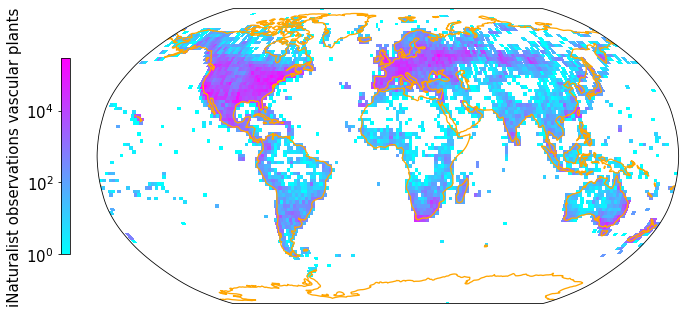

In [42]:
plt.rcParams.update({'font.size': 15})

Z, xedges, yedges = np.histogram2d(np.array(iNat_TRY['decimalLongitude'],dtype=float),
                                   np.array(iNat_TRY['decimalLatitude']),bins = [181, 91])

data_crs = ccrs.PlateCarree()
#for colorbar
cmap = plt.get_cmap('cool')
im_ratio = Z.shape[0]/Z.shape[1]

#plot map
fig = plt.figure(figsize=(12, 12)) # I created a new figure and set up its size

#create base plot of a world map
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson()) # I used the PlateCarree projection from cartopy
ax.set_global()
#add coastlines
ax.coastlines(resolution='110m', color='orange', linewidth=1.3)
#add grid with values
im = ax.pcolormesh(xedges, yedges, Z.T, cmap="cool", norm=LogNorm(), transform=data_crs)
#add color bar
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="3%", pad=0.05)
#fig.colorbar(im, cax=cax)
fig.colorbar(im,fraction=0.046*im_ratio, pad=0.04, shrink=0.3, location="left", label="iNaturalist observations vascular plants")


plt.savefig('Figures/iNat_density_Robinson_TRY.pdf', bbox_inches='tight')

